In [3]:
'''读取文件'''
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024abx25'
# base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024abx0'
# base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024abx25'
file_prefix = 'density'
file_suffix = '.sdf'
file_index = 18

file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
den_crit = 0.17419597124e28
Density_Data = sh.getdata(file_path)
sh.list_variables(Density_Data)

ne = Density_Data.Derived_Number_Density_Photon.data / den_crit
E = Density_Data.Derived_Average_Particle_Energy_Photon.data
ne = ne*E

x = Density_Data.Grid_Grid_mid.data[0] / (1e-6)  # 归一化
y = Density_Data.Grid_Grid_mid.data[1] / (1e-6)
z = Density_Data.Grid_Grid_mid.data[2] / (1e-6)

# 切片
x_indices = slice(0, ne.shape[0])
x_values = x[x_indices]
y_indices = slice(0, ne.shape[1])
y_values = y[y_indices]
ne_slice = ne[x_indices, y_indices, 500]

'''检查范围'''
# ---- 找到 y 在 -2 到 2 微米对应的索引范围 ----
y_min, z_min = -2, -2  # 单位：微米
y_max, z_max = 2, 2

# 获取对应索引
y_indices_range = np.where((y >= y_min) & (y <= y_max))[0]
y_start = y_indices_range[0]
y_end = y_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

z_indices_range = np.where((z >= z_min) & (z <= z_max))[0]
z_start = z_indices_range[0]
z_end = z_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

# ---- 对 y (选中范围) 和 z 求和 ----
ne_sum_partial_y = np.sum(ne[:, y_start:y_end, z_start:z_end], axis=(1, 2))  # 只在选定 y 区域和整个 z 上求和

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024abx25/density0018.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid
Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 3,  1, 50]
Derived_Average_Particle_Energy_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Ion_H <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Photon <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Ion_H <class 'sdf.BlockPlainVariable'> [1

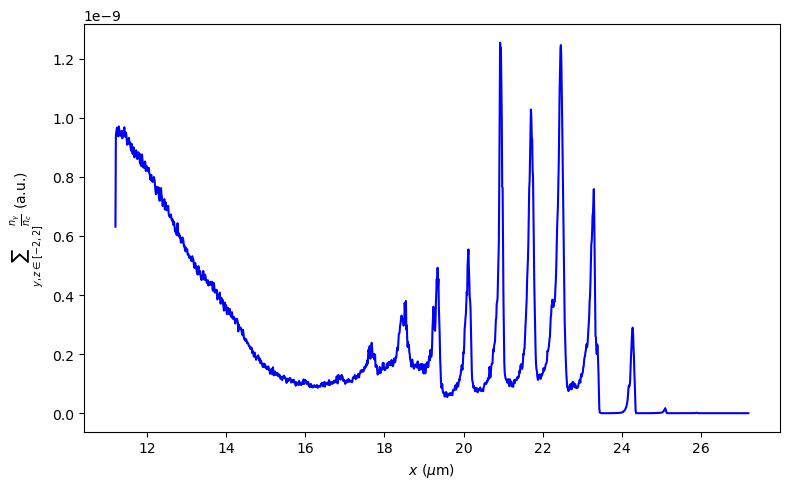

In [5]:
# 15：[(17.3,18),(18,18.8),(18.8,19.8),(19.8,20.4),(20.4,21.4),(21.4,22.2),(22.2,22.8)(22.8,23.7),(23.7,24.8),(24.8,25.8)]
# 35：[(18.0,18.8),(18.8,19.6),(19.6,20.4),(20.4,21.2),(21.2,22.0),(22.0,23.0),(23.0,23.8),(23.8,24.8),(24.8,25.4)]
# -25：[(17.3,18),(18,18.8),(18.8,19.8),(19.8,20.4),(20.4,21.4),(21.4,22.2),(22.2,22.8)(22.8,23.7),(23.7,24.8),(24.8,25.8)]
# 45：[(17.3,18),(18,19),(19,19.6),(19.6,20.5),(20.5,21.2),(21.2,22),(22,23),(23,24),(24,24.5)]
# 55：[(18,18.8),(18.8,19.6),(19.6,20.5),(20.5,21.3),(21.3,22),(22,23),(23,23.8),(23.8,24.6)]
x_min, x_max =(10.0,30.6)# 修改为你需要的 x 区间（单位：μm）23.524.5
x_mask = (x_values >= x_min) & (x_values <= x_max)

x_values_limited = x_values[x_mask]
ne_limited = ne_sum_partial_y[x_mask]

# ---- 绘图 ----
plt.figure(figsize=(8, 5))
plt.plot(x_values_limited, ne_limited, color='blue')
plt.xlabel(r'$x\ (\mu\mathrm{m})$')
# plt.ylabel(r'$\sum_{y\in[-2,2],z\in[-2,2]} n_\gamma / n_c$ (a.u.)')
plt.ylabel(r'$\sum_{y,z\in[-2,2]} \frac{n_\gamma}{n_c}$ (a.u.)')
# plt.title(f'Photon Density (x ∈ [{x_min}, {x_max}] μm; y, z ∈ [−2, 2] μm)')
# plt.grid(True)
plt.tight_layout()
plt.show()

FWHM = 0.1105
0.036847514180847675


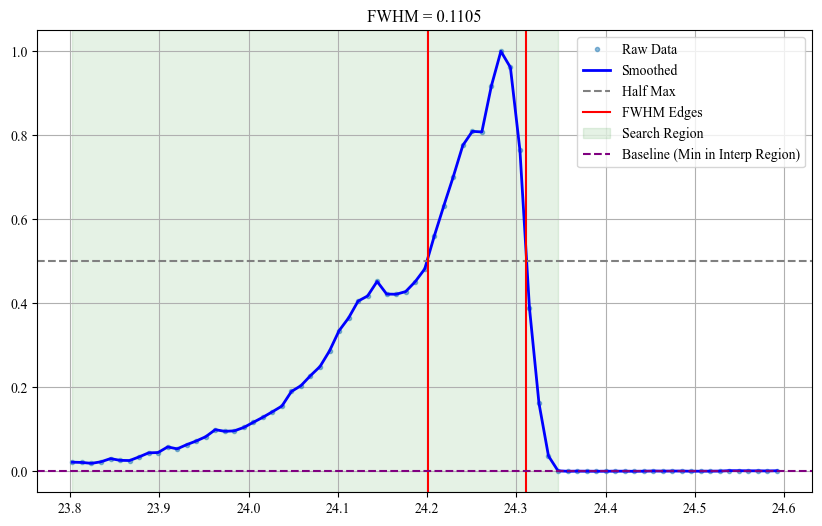

In [32]:
'''寻找半高宽'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

# 构造包含杂波和主峰的信号
x = x_values_limited
y = ne_limited/ne_limited.max()

# 平滑信号（可选）
y_smooth = gaussian_filter1d(y, sigma=0.01)

# 识别主峰（最高峰）
peaks, _ = find_peaks(y_smooth, height=0.2)  # 设置最小高度阈值
if len(peaks) == 0:
    raise ValueError("未检测到峰值")
main_peak_idx = peaks[np.argmax(y_smooth[peaks])]  # 选择最高峰
x_peak = x[main_peak_idx]
y_peak = y_smooth[main_peak_idx]

# 确定主峰附近的局部搜索区域
peak_val = y_peak * 0.01  # 主峰高度的1%作为阈值
left_bound = np.where(y_smooth[:main_peak_idx] < peak_val)[0]
left_bound = left_bound[-1] + 1 if left_bound.size > 0 else 0

right_bound = np.where(y_smooth[main_peak_idx:] < peak_val)[0]
right_bound = right_bound[0] + main_peak_idx if right_bound.size > 0 else len(x) - 1

# 确保边界合理
search_region = slice(max(0, left_bound), min(len(x), right_bound + 1))
x_local = x[search_region]
y_local = y_smooth[search_region]

# 在局部区域插值
f = interp1d(x_local, y_local, kind='cubic')
x_dense = np.linspace(x_local[0], x_local[-1], 1000)
y_dense = f(x_dense)

# # 计算半高位置
# y_half = y_peak / 2
# 计算底部值（例如局部区域最小值）
y_base = np.min(y_local)
# 修正的半高位置
y_half = (y_peak + y_base) / 2

# 在插值数据中找到主峰位置
peak_idx_dense = np.argmax(y_dense)
left_side = y_dense[:peak_idx_dense]
right_side = y_dense[peak_idx_dense:]

# 找到半高交点
left_cross_idx = np.where(left_side >= y_half)[0][0] if np.any(left_side >= y_half) else 0
right_cross_idx = np.where(right_side >= y_half)[0][-1] + peak_idx_dense if np.any(right_side >= y_half) else len(y_dense) - 1

left_cross = x_dense[left_cross_idx]
right_cross = x_dense[right_cross_idx]

fwhm = right_cross - left_cross
print(f"FWHM = {fwhm:.4f}")
print(fwhm/3)
# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(x, y, '.', alpha=0.5, label='Raw Data')
plt.plot(x, y_smooth, 'b-', label='Smoothed', linewidth=2)
plt.axhline(y_half, color='gray', linestyle='--', label='Half Max')
plt.axvline(left_cross, color='r', linestyle='-', label='FWHM Edges')
plt.axvline(right_cross, color='r', linestyle='-')
plt.axvspan(x_local[0], x_local[-1], alpha=0.1, color='green', label='Search Region')
plt.title(f"FWHM = {fwhm:.4f}")
# 绘制一条基线条
plt.axhline(y_base, color='purple', linestyle='--', label='Baseline (Min in Interp Region)')
plt.legend()
plt.grid(True)
plt.show()

FWHM = 0.12159
Full Width = 0.54856
0.04053119786453152


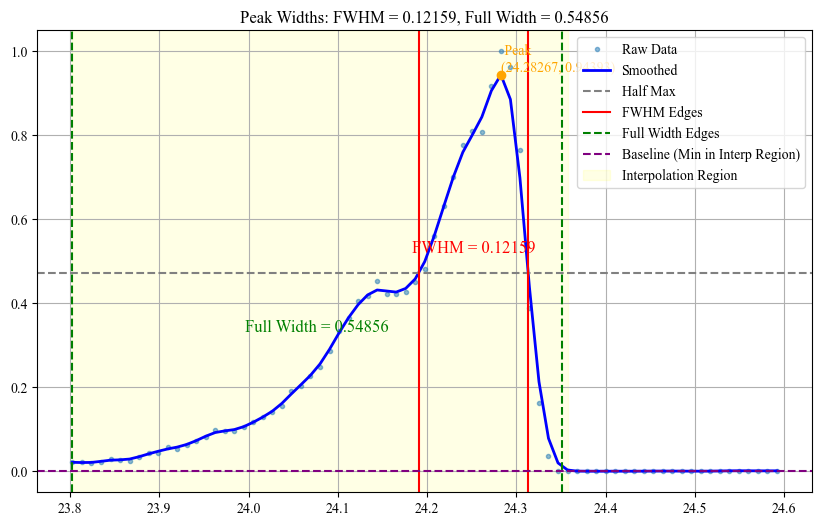

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

# 构造包含杂波和主峰的信号
x = x_values_limited
y = ne_limited/ne_limited.max()

# 平滑信号（可选）
y_smooth = gaussian_filter1d(y, sigma=1)

# 识别主峰（最高峰）
peaks, _ = find_peaks(y_smooth, height=0.2)  # 设置最小高度阈值
if len(peaks) == 0:
    raise ValueError("未检测到峰值")
main_peak_idx = peaks[np.argmax(y_smooth[peaks])]  # 选择最高峰
x_peak = x[main_peak_idx]
y_peak = y_smooth[main_peak_idx]

# 确定主峰附近的局部搜索区域
peak_val = y_peak * 0.01  # 主峰高度的30%作为阈值

# 找全宽左右边界（信号小于阈值部分）
left_full_candidates = np.where(y_smooth[:main_peak_idx] < peak_val)[0]
left_full = left_full_candidates[-1] + 1 if left_full_candidates.size > 0 else 0

right_full_candidates = np.where(y_smooth[main_peak_idx:] < peak_val)[0]
right_full = right_full_candidates[0] + main_peak_idx if right_full_candidates.size > 0 else len(x) - 1

# # 找半高宽左右边界
# y_half = y_peak / 2
# 基线：用插值区最小值作为底部
y_base = np.min(y_local)
# 半高位置：底部与主峰中点
y_half = (y_peak + y_base) / 2

left_half_candidates = np.where(y_smooth[:main_peak_idx] < y_half)[0]
left_half = left_half_candidates[-1] + 1 if left_half_candidates.size > 0 else 0

right_half_candidates = np.where(y_smooth[main_peak_idx:] < y_half)[0]
right_half = right_half_candidates[0] + main_peak_idx if right_half_candidates.size > 0 else len(x) - 1

# 局部插值：为了更精确计算半高宽和全宽，插值范围取全宽边界
x_local = x[left_full:right_full + 1]
y_local = y_smooth[left_full:right_full + 1]
f = interp1d(x_local, y_local, kind='cubic')
x_dense = np.linspace(x_local[0], x_local[-1], 1000)
y_dense = f(x_dense)

# 找主峰索引（密集采样中）
peak_idx_dense = np.argmax(y_dense)

# 计算半高宽左右交点
left_side = y_dense[:peak_idx_dense]
right_side = y_dense[peak_idx_dense:]

left_cross_idx = np.where(left_side >= y_half)[0][0] if np.any(left_side >= y_half) else 0
right_cross_idx = np.where(right_side >= y_half)[0][-1] + peak_idx_dense if np.any(right_side >= y_half) else len(y_dense) - 1

left_cross = x_dense[left_cross_idx]
right_cross = x_dense[right_cross_idx]
fwhm = right_cross - left_cross

# 计算全宽左右交点（信号达到阈值 peak_val 的交点）
left_full_idx = np.where(y_dense >= peak_val)[0][0] if np.any(y_dense >= peak_val) else 0
right_full_idx_candidates = np.where(y_dense[peak_idx_dense:] >= peak_val)[0]
right_full_idx = right_full_idx_candidates[-1] + peak_idx_dense if right_full_idx_candidates.size > 0 else len(y_dense) - 1

left_full_cross = x_dense[left_full_idx]
right_full_cross = x_dense[right_full_idx]
full_width = right_full_cross - left_full_cross

print(f"FWHM = {fwhm:.5f}")
print(f"Full Width = {full_width:.5f}")
print(fwhm/3)
# 绘图
plt.figure(figsize=(10, 6))
plt.plot(x, y, '.', alpha=0.5, label='Raw Data')
plt.plot(x, y_smooth, 'b-', label='Smoothed', linewidth=2)
plt.axhline(y_half, color='gray', linestyle='--', label='Half Max')

# FWHM 标记
plt.axvline(left_cross, color='red', linestyle='-', label='FWHM Edges')
plt.axvline(right_cross, color='red', linestyle='-')
plt.text((left_cross + right_cross) / 2, y_half * 1.1, f'FWHM = {fwhm:.5f}', color='red', fontsize=12, ha='center')

# 全宽标记
plt.axvline(left_full_cross, color='green', linestyle='--', label='Full Width Edges')
plt.axvline(right_full_cross, color='green', linestyle='--')
plt.text((left_full_cross + right_full_cross) / 2, y_half * 0.7, f'Full Width = {full_width:.5f}', color='green', fontsize=12, ha='center')

# 主峰位置
plt.scatter(x_peak, y_peak, color='orange', zorder=5)
plt.text(x_peak, y_peak, f' Peak\n({x_peak:.5f}, {y_peak:.5f})', verticalalignment='bottom', horizontalalignment='left', color='orange')

# 绘制一条基线条
plt.axhline(y_base, color='purple', linestyle='--', label='Baseline (Min in Interp Region)')

plt.axvspan(x_local[0], x_local[-1], alpha=0.1, color='yellow', label='Interpolation Region')
plt.title(f"Peak Widths: FWHM = {fwhm:.5f}, Full Width = {full_width:.5f}")
plt.legend()
plt.grid(True)
plt.show()